### Predicting Insurance price 

In [ ]:
# Creating table in psql
sudo su - postgrese # In terminal
psql # In terminal
\c adarsh_personal # In terminal
create table medical (age int, sex char(6), bmi float, children int, smoker char(5), 
                      region varchar(50), charges float); # In terminal
# Copy data from csv file
\copy medical (age, sex, bmi, children, smoker, region, charges)
from '/home/adarsh/Downloads/Machine Learning/insurance.csv' CSV HEADER;

### Importing the libraries

In [1]:
import pandas as pd
import numpy as np

### Connecting the notebook with the database

In [2]:
import psycopg2
connection = psycopg2.connect(user = "postgres",
                                  password = "",
                                  host = "127.0.0.1",
                                  port = "5432",
                                  database = "adarsh_personal")

### Importing the dataset

In [3]:
data = pd.read_sql_query('''select * from medical''', connection);

In [4]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

### Sql query for fetching data from the database

In [6]:
pd.read_sql_query('''select distinct region from medical''', connection)

,region
0,northwest
1,southwest
2,northeast
3,southeast


In [7]:
pd.read_sql_query('''select min(age) as min_age, max(age) as max_age from medical''', connection)

,min_age,max_age
0,18,64


### Data Analytics and Visualization

### Cutting the columns into groups

In [8]:
df_1 = pd.cut(data.age,bins=[17,26,36,51,65],labels=['Young','Middle','Adult','Elderly'])
data.insert(2,'age_group',df_1)

In [9]:
data.head()

,age,sex,age_group,bmi,children,smoker,region,charges
0,19,female,Young,27.900,0,yes,southwest,16884.92400
1,18,male,Young,33.770,1,no,southeast,1725.55230
2,28,male,Middle,33.000,3,no,southeast,4449.46200
3,33,male,Middle,22.705,0,no,northwest,21984.47061
4,32,male,Middle,28.880,0,no,northwest,3866.85520


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

### Unstacking the columns for plotting

In [11]:
df_2 = data.groupby('age_group')['smoker'].value_counts().unstack().add_prefix('').rename_axis(None, axis =1).reset_index()

In [12]:
df_2.head(10)

,age_group,no,yes
0,Young,266,68
1,Middle,206,59
2,Adult,323,89
3,Elderly,269,58


In [13]:
df_2.dtypes

age_group    category
no              int64
yes             int64
dtype: object

In [14]:
for col in df_2.columns: 
    print(col)

age_group
no   
yes  


### Changing the columns name

In [15]:
df_2.columns =['Group', 'No', 'Yes']

In [16]:
df_2.head()

,Group,No,Yes
0,Young,266,68
1,Middle,206,59
2,Adult,323,89
3,Elderly,269,58


### Adding total column for percentage calculation

In [17]:
df_2["Total"] = df_2["No"] + df_2["Yes"]

In [18]:
df_2.head()

,Group,No,Yes,Total
0,Young,266,68,334
1,Middle,206,59,265
2,Adult,323,89,412
3,Elderly,269,58,327


In [19]:
df_2["Percentag_no"] = (df_2["No"] / df_2["Total"])*100

In [20]:
df_2.head()

,Group,No,Yes,Total,Percentag_no
0,Young,266,68,334,79.640719
1,Middle,206,59,265,77.735849
2,Adult,323,89,412,78.398058
3,Elderly,269,58,327,82.262997


In [21]:
df_2["Percentag_Yes"] = (df_2["Yes"] / df_2["Total"])*100

In [22]:
df_2.head()

,Group,No,Yes,Total,Percentag_no,Percentag_Yes
0,Young,266,68,334,79.640719,20.359281
1,Middle,206,59,265,77.735849,22.264151
2,Adult,323,89,412,78.398058,21.601942
3,Elderly,269,58,327,82.262997,17.737003


### Adjusting the plot size

In [23]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (6,4)

### Plotting bar chart

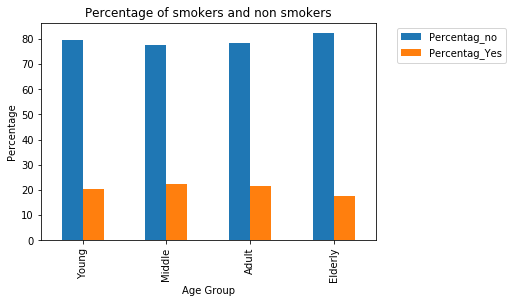

In [24]:
df_2.plot(x="Group", y=["Percentag_no", "Percentag_Yes"], kind="bar")
plt.axis(aspect='equal')
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.title('Percentage of smokers and non smokers')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

### Conclusion :- The smokers are almost equal in percentage in all the age groups

### Percentage of smokers in male and female

In [25]:
data = pd.read_sql_query('''select * from medical''', connection);

In [26]:
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [27]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


### Unstacking the dataset

In [28]:
df_3 = data.groupby('sex')['smoker'].value_counts().unstack().add_prefix('').rename_axis(None,axis=1).reset_index()
df_3

,sex,no,yes
0,female,547,115
1,male,517,159


In [29]:
df_3.columns =['Sex', 'Non_Smoker', 'Smoker']

In [30]:
df_3

,Sex,Non_Smoker,Smoker
0,female,547,115
1,male,517,159


### Calculating percentage 

In [31]:
df_3["Total"] = df_3["Non_Smoker"] + df_3["Smoker"]

In [32]:
df_3

,Sex,Non_Smoker,Smoker,Total
0,female,547,115,662
1,male,517,159,676


In [33]:
df_3["Percentage Non_Smoker"] =( df_3["Non_Smoker"] / df_3["Total"])*100

In [34]:
df_3

,Sex,Non_Smoker,Smoker,Total,Percentage Non_Smoker
0,female,547,115,662,82.628399
1,male,517,159,676,76.479290


In [35]:
df_3["Percentage Smoker"] = (df_3["Smoker"] / df_3["Total"])*100

In [36]:
df_3

,Sex,Non_Smoker,Smoker,Total,Percentage Non_Smoker,Percentage Smoker
0,female,547,115,662,82.628399,17.371601
1,male,517,159,676,76.479290,23.520710


In [37]:
plt.rcParams['figure.figsize']=(6,4)

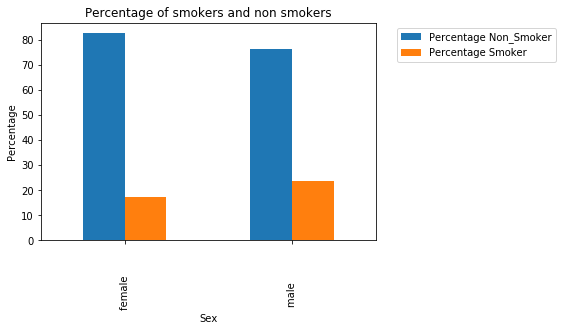

In [38]:
df_3.plot(x = "Sex", y=["Percentage Non_Smoker","Percentage Smoker"], kind ='bar')
plt.axis(aspect ='equal')
plt.xlabel('Sex')
plt.ylabel('Percentage')
plt.title('Percentage of smokers and non smokers')
plt.legend(bbox_to_anchor =(1.05, 1.0), loc='upper left')

### Conclusion :- Male have slightly higher percentage of smokers than female

### Regionwise count of smokers and non-smokers

In [39]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [40]:
df_4 = data.groupby('region')['smoker'].value_counts().unstack().add_prefix('').rename_axis(None, axis =1).reset_index()

In [41]:
df_4

,region,no,yes
0,northeast,257,67
1,northwest,267,58
2,southeast,273,91
3,southwest,267,58


In [42]:
df_4.columns =["Region","No","Yes"]

In [43]:
df_4

,Region,No,Yes
0,northeast,257,67
1,northwest,267,58
2,southeast,273,91
3,southwest,267,58


In [44]:
df_4["Total"] = df_4["No"]+df_4["Yes"]

In [45]:
df_4

,Region,No,Yes,Total
0,northeast,257,67,324
1,northwest,267,58,325
2,southeast,273,91,364
3,southwest,267,58,325


In [46]:
df_4["Percentage_Smoker"] = (df_4["Yes"]/df_4["Total"])*100

In [47]:
df_4["Percentage_non-smoker"] =(df_4["No"]/df_4["Total"]*100)

In [48]:
df_4

,Region,No,Yes,Total,Percentage_Smoker,Percentage_non-smoker
0,northeast,257,67,324,20.679012,79.320988
1,northwest,267,58,325,17.846154,82.153846
2,southeast,273,91,364,25.000000,75.000000
3,southwest,267,58,325,17.846154,82.153846


In [49]:
plt.rcParams['figure.figsize']=(6,4)

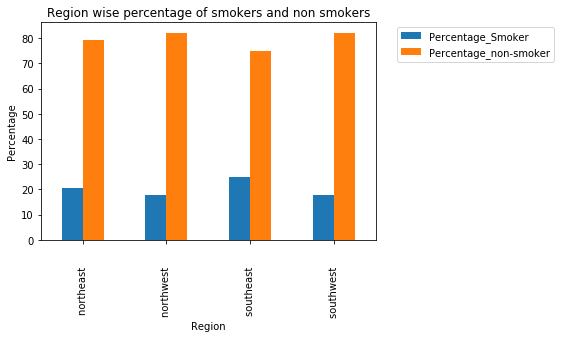

In [50]:
df_4.plot(x = "Region", y =["Percentage_Smoker","Percentage_non-smoker"], kind ='bar')
plt.axis(aspect = 'equal')
plt.xlabel("Region")
plt.ylabel("Percentage")
plt.title("Region wise percentage of smokers and non smokers")
plt.legend(bbox_to_anchor =(1.05, 1.0), loc ='upper left')

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

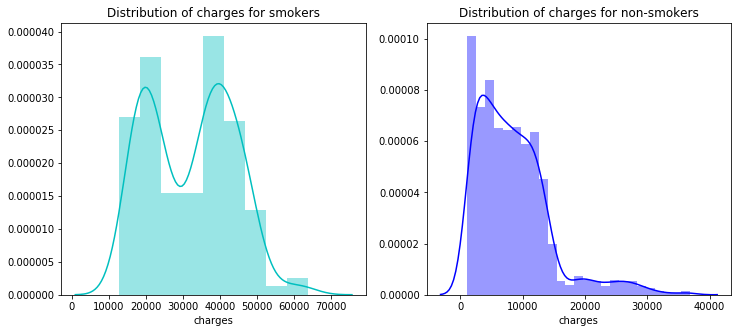

In [182]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(data[(data.smoker == 1)]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.distplot(data[(data.smoker == 0)]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers')

In [181]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,0,northwest,10600.54830
1334,18,female,31.920,0,0,northeast,2205.98080
1335,18,female,36.850,0,0,southeast,1629.83350
1336,21,female,25.800,0,0,southwest,2007.94500


In [185]:
data.sex = data.sex.str.strip()

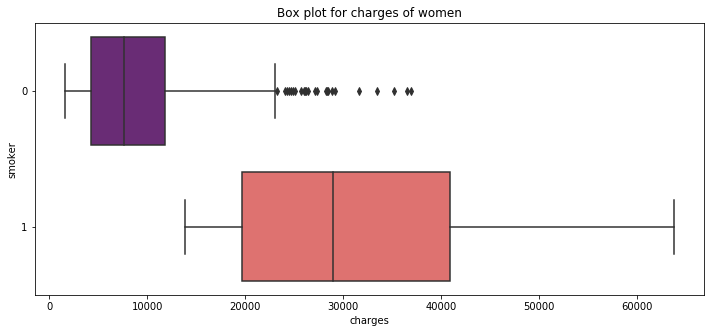

In [187]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of women")
sns.boxplot(y="smoker", x="charges", data =  data[(data.sex == 'female')] , orient="h", palette = 'magma')

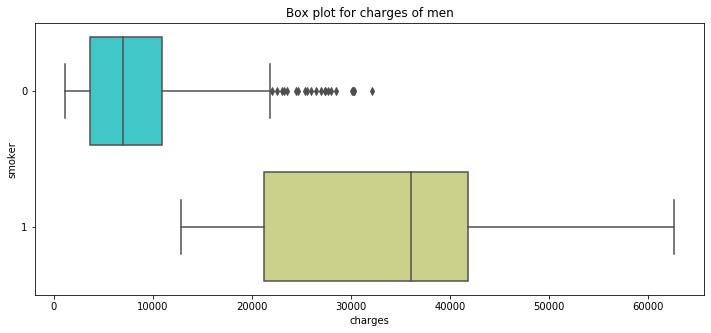

In [188]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of men")
sns.boxplot(y="smoker", x="charges", data =  data[(data.sex == 'male')] , orient="h", palette = 'rainbow')

###  Conclusion : - South east region have highest number of smokers

In [51]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Regression for predicting the insurance cost

### Dealing with the categorical variable

### Odinal Feature :- Odinal feature can be understood as a categorical value that can be stored or ordered.
### Example t-shirt size is ordinal feature xl > l> s.

### Nominal Feature : - T-shirt size is nominal feature. There is no order in it.

### Mapping Odinal feature

In [52]:
# Removing white space from the dataset
data.smoker = data.smoker.str.strip()
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [53]:
pd.read_sql_query('''select distinct smoker from medical''', connection)

,smoker
0,no
1,yes


In [54]:
# Mapping ordinal feature
smoker_mapping = {'no' : 0, 'yes' : 1}
data['smoker'] = data['smoker'].map(smoker_mapping)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520


### Mapping nominal feature

In [78]:
X = pd.get_dummies(data[['age','sex','bmi','children','smoker','region','charges']])# WE can also use drop_first = True to remove first column
X.head()

,age,bmi,children,smoker,charges,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,16884.92400,1,0,0,0,0,1
1,18,33.770,1,0,1725.55230,0,1,0,0,1,0
2,28,33.000,3,0,4449.46200,0,1,0,0,1,0
3,33,22.705,0,0,21984.47061,0,1,0,1,0,0
4,32,28.880,0,0,3866.85520,0,1,0,1,0,0


### Removing the northeast column to remove multi-collinearity

In [79]:
X.columns = ['age','bmi','children','smoker','charges','sex_female','sex_male','region_northeast','region_northwest',
             'region_southeast','region_southwest']

In [174]:
df = X.drop(columns=['region_northeast'])
X.head()

AttributeError: 'numpy.ndarray' object has no attribute 'drop'

### Plotting the co-relation plot to determine the relation between the variables

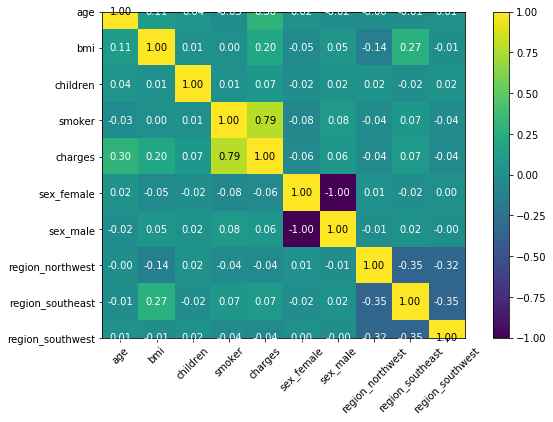

In [172]:
plt.rcParams['figure.figsize']=(10,6)
col = ['age','bmi','children','smoker','charges','sex_female','sex_male','region_northwest',
             'region_southeast','region_southwest']
from mlxtend.plotting import heatmap
import numpy as np
cm = np.corrcoef(df[col].values.T)
hm = heatmap(cm, row_names =col, column_names =col)
plt.show()

In [176]:
df.corr()['charges'].sort_values()

sex_female         -0.057292
region_southwest   -0.043210
region_northwest   -0.039905
sex_male            0.057292
children            0.067998
region_southeast    0.073982
bmi                 0.198341
age                 0.299008
smoker              0.787251
charges             1.000000
Name: charges, dtype: float64

### Co-relation :- Insurance has strong co-relation with smoker and weak co-relation eith bmi and age

### Regression model for predicting the charges

In [219]:
X = df[['smoker','age','bmi']].values
y = df['charges'].values

In [220]:
X

array([[ 1.  , 19.  , 27.9 ],
       [ 0.  , 18.  , 33.77],
       [ 0.  , 28.  , 33.  ],
       ...,
       [ 0.  , 18.  , 36.85],
       [ 0.  , 21.  , 25.8 ],
       [ 1.  , 61.  , 29.07]])

In [221]:
y

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [222]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()

In [223]:
X_std = sc_x.fit_transform(X)
X_std

array([[ 1.97058663, -1.43876426, -0.45332   ],
       [-0.5074631 , -1.50996545,  0.5096211 ],
       [-0.5074631 , -0.79795355,  0.38330685],
       ...,
       [-0.5074631 , -1.50996545,  1.0148781 ],
       [-0.5074631 , -1.29636188, -0.79781341],
       [ 1.97058663,  1.55168573, -0.26138796]])

In [224]:
y

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [226]:
sc_y.fit(df.charges.values.reshape(-1, 1))
y_std = sc_y.transform(df.charges.values.reshape(-1, 1))

In [227]:
y_std

array([[ 0.2985838 ],
       [-0.95368917],
       [-0.72867467],
       ...,
       [-0.96159623],
       [-0.93036151],
       [ 1.31105347]])

In [228]:
X_std

array([[ 1.97058663, -1.43876426, -0.45332   ],
       [-0.5074631 , -1.50996545,  0.5096211 ],
       [-0.5074631 , -0.79795355,  0.38330685],
       ...,
       [-0.5074631 , -1.50996545,  1.0148781 ],
       [-0.5074631 , -1.29636188, -0.79781341],
       [ 1.97058663,  1.55168573, -0.26138796]])

In [229]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [230]:
x_train, x_test, y_train,y_test = train_test_split(X_std,y_std, random_state = 0)
lr = LinearRegression().fit(x_train, y_train)
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)
print(lr.score(x_test,y_test))

0.7924327534321974


In [235]:
y_train_pred

array([[-0.58148032],
       [-0.16883365],
       [-0.98440911],
       ...,
       [-0.53081668],
       [-0.6999515 ],
       [-0.84909722]])